In [ ]:
import numpy as np
import os
import h5py

In [ ]:
def write_hdf5(data, output_filename):

    x = data.astype(np.uint8)

    with h5py.File(output_filename, 'w') as h:
        h.create_dataset('data', data=x, shape=x.shape)

In [ ]:
def read_data(samples, prefix):
    for sample in samples:
        names = os.listdir('{}/{}/recon'.format(prefix, sample))
        amount = len(names)
        h5name = prefix + '_' + sample + '.h5'
        shape_full = np.fromfile('{}/{}/recon/{}'.format(prefix, sample, names[0]), dtype=np.uint8).shape[0]
        shape = int(shape_full**(1/2))

        data_array = np.empty((amount, shape, shape))
        print(data_array.shape)
        print(h5name, sample, amount)
        count = 0
        for name in sorted(names):

            part_data = np.fromfile('{}/{}/recon/{}'.format(prefix, sample, name), dtype=np.uint8)
            part_data = part_data.reshape((shape, shape))
            data_array[count] = part_data.copy()
            count += 1
        
        write_hdf5(data_array, h5name)

In [ ]:
!ls ../data/sub_data/

In [ ]:
samples = os.listdir('../data/sub_data/dir')
read_data(samples, '../data/sub_data/dir/')

<IPython.core.display.Javascript object>


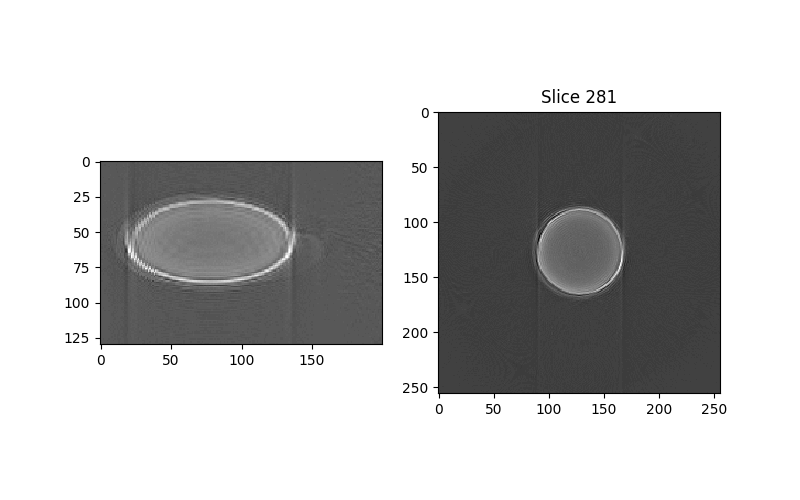

In [2]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os
sys.path.append('../dev')
import predict

# %matplotlib inline
# %matplotlib ipympl

h5 = h5py.File('../data/sub_data/sub_data_pen.h5', 'r')


data = np.empty((512, 256, 256)).astype('uint8')
data = np.array(h5['data'])
predict.multi_slice_viewer(data.transpose()[:,70:200,200:400], data)

# plt.figure(figsize=[10,10])
# plt.imshow(data[200:350, :, 128], cmap='gray')
# plt.show()